In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf

In [4]:
from tensorflow.keras.datasets import fashion_mnist

In [5]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [10]:
len(y_train)

60000

In [7]:
len(x_test)

10000

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [16]:
print(x_train.shape)

(60000, 784)


In [17]:
print(y_train.shape)

(60000, 10)


## 將cmap調成藍色

這是 Sandal


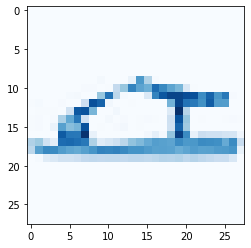

In [14]:
n = 120
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n],cmap='Blues');

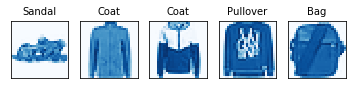

In [15]:
pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Blues')

In [12]:
x_train=x_train/255
x_test=x_test/255
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)

In [14]:
from tensorflow.keras.utils import to_categorical

In [57]:
y_train[12]

5

In [15]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_train,10)

In [59]:
y_train[12]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

## 調整層數及維度

In [1]:
models=Sequential()
models.add(Dense(111,input_dim=784,activation='relu'))
models.add(Dense(111,activation='relu'))
models.add(Dense(10,activation='softmax'))

NameError: name 'Sequential' is not defined

In [62]:
models.compile(loss='mse',optimizer=SGD(lr=0.087),metrics=['accuracy'])

In [63]:
models.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 111)               87135     
_________________________________________________________________
dense_4 (Dense)              (None, 111)               12432     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1120      
Total params: 100,687
Trainable params: 100,687
Non-trainable params: 0
_________________________________________________________________


In [64]:
111*784+111

87135

## 調整一次訓練所用的資料量及訓練次數

In [65]:
models.fit(x_train,y_train,batch_size=87,epochs=23)

Train on 60000 samples
Epoch 1/23
60000/60000 [==============================] - 19s 320us/sample - loss: 0.0683 - accuracy: 0.4897
Epoch 2/23
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0443 - accuracy: 0.6802
Epoch 3/23
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0373 - accuracy: 0.7420
Epoch 4/23
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0329 - accuracy: 0.7840
Epoch 5/23
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0299 - accuracy: 0.8042
Epoch 6/23
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0280 - accuracy: 0.8167
Epoch 7/23
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0266 - accuracy: 0.8245
Epoch 8/23
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0256 - accuracy: 0.8310
Epoch 9/23
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0248 - accuracy: 0.8339
Epoch 10/23


## 原本想重新調整看相關性，結果他直接照已經訓練過的精確度去訓練，但跑一次要跑好久，就不想理他了，下次會想辦法去做比較(如：restart或換activation函數。

In [66]:
models.fit(x_train,y_train,batch_size=111,epochs=15)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0201 - accuracy: 0.8648
Epoch 2/15
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0200 - accuracy: 0.8652
Epoch 3/15
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0198 - accuracy: 0.8670
Epoch 4/15
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0197 - accuracy: 0.8676
Epoch 5/15
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0196 - accuracy: 0.8681
Epoch 6/15
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0195 - accuracy: 0.8691
Epoch 7/15
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0194 - accuracy: 0.8701
Epoch 8/15
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0193 - accuracy: 0.8699
Epoch 9/15
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0192 - accuracy: 0.8712
Epoch 10/15
60

In [18]:
result=models.predict_classes(x_test)

NameError: name 'models' is not defined

神經網路說是: Coat


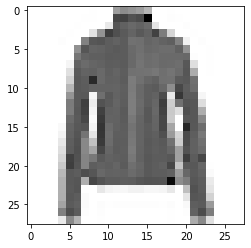

In [72]:
n=1234
print('神經網路說是:',class_names[result[]])
plt.imshow(x_test[n].reshape(28,28),cmap='Greys')

# 下方是將預測結果改為互動式

In [74]:
def ans(n):
    print('神經網路說是:',class_names[result[n]])
    plt.imshow(x_test[n].reshape(28,28),cmap='Greys')

In [75]:
from ipywidgets import interact

In [78]:
interact(ans,n=(1,9999))

interactive(children=(IntSlider(value=5000, description='n', max=9999, min=1), Output()), _dom_classes=('widge…

<function __main__.ans(n)>